![workflow graph](Figures/SolutionNo_3_length_7.png "Workflow Graph")

In [10]:
from pathlib import Path
import sys

import pandas as pd

sys.path.append('/Users/stevep/Documents/code/APE_thesis/ape-thesis')
from wrapper_functions import *    

## Workflow Input Objects

### Table 1
- id: `housing_train`
- source: `/Users/stevep/Documents/code/APE_thesis/ape-thesis/usecases/house_prices/train.csv`
- DataClass: `MixedDataFrame`
- DataClass: `NoRelevance`    

In [11]:
housing_train = load_table_csv('/Users/stevep/Documents/code/APE_thesis/ape-thesis/usecases/house_prices/train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 1: `k_most_corr_indep_var_corr_matrix`
#### Notes
Matrix of `k` most to `col` correlating columns.
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['housing_train']`
	- src: `(0, 11)`
- 2
	- DataClass: `IntColumn`
	- StatisticalRelevance: `DependentVariable`
	- APE_label: `['SalePrice']`
	- src: `(0, 9)`
- 3
	- DataClass: `Int`
	- StatisticalRelevance: `BasicObjectRelevance_plain`
	- APE_label: `['10']`
	- src: `(0, 13)`
#### outputs:
- 1
	- DataClass: `FloatDataFrame`
	- StatisticalRelevance: `NoRelevance`

In [12]:
floatDataFrame_1_1 = k_most_corr_indep_var_corr_matrix(data=housing_train, col='SalePrice', k=10)

### Step 2: `scatterplot`
#### Notes
> kwarg `hue` should be column with few features.
    > kwarg `style` should be column with few features.
    
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['housing_train']`
	- src: `(0, 11)`
- 2
	- DataClass: `IntColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['TotalBsmtSF']`
	- src: `(0, 2)`
- 3
	- DataClass: `IntColumn`
	- StatisticalRelevance: `DependentVariable`
	- APE_label: `['SalePrice']`
	- src: `(0, 9)`
- 4
	- DataClass: `IntColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['GarageCars']`
	- src: `(0, 7)`
#### outputs:
- 1
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`
- 2
	- DataClass: `Axes`
	- StatisticalRelevance: `NoRelevance`

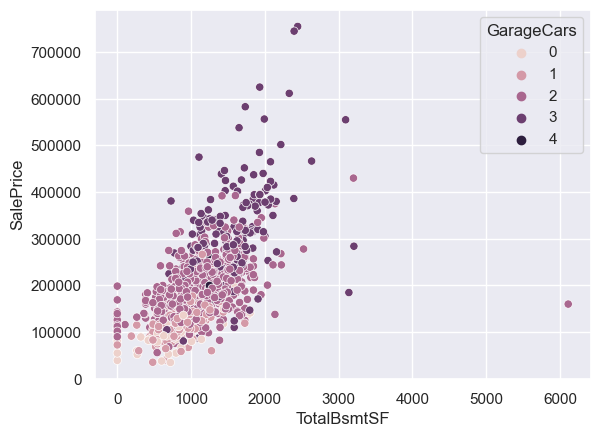

In [13]:
figure_2_1, axes_2_2 = scatterplot(df=housing_train, x='TotalBsmtSF', y='SalePrice', hue='GarageCars')

### Step 3: `set_figure_size`

#### inputs:
- 1
	- DataClass: `Int`
	- StatisticalRelevance: `BasicObjectRelevance_plain`
	- APE_label: `['9']`
	- src: `(0, 12)`
- 2
	- DataClass: `Int`
	- StatisticalRelevance: `BasicObjectRelevance_plain`
	- APE_label: `['16']`
	- src: `(0, 14)`
#### outputs:
- 1
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`
- 2
	- DataClass: `Axes`
	- StatisticalRelevance: `NoRelevance`

In [14]:
figure_3_1, axes_3_2 = set_figure_size(x_size=9, y_size=16)

### Step 4: `heatmap`
#### Notes
`piv_col1`, `piv_col2` and `num_col`
    can be used to pivot the table before creating a heatmap
#### inputs:
- 1
	- DataClass: `FloatDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- src: `(1, 0)`
#### outputs:
- 1
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`
- 2
	- DataClass: `Axes`
	- StatisticalRelevance: `NoRelevance`

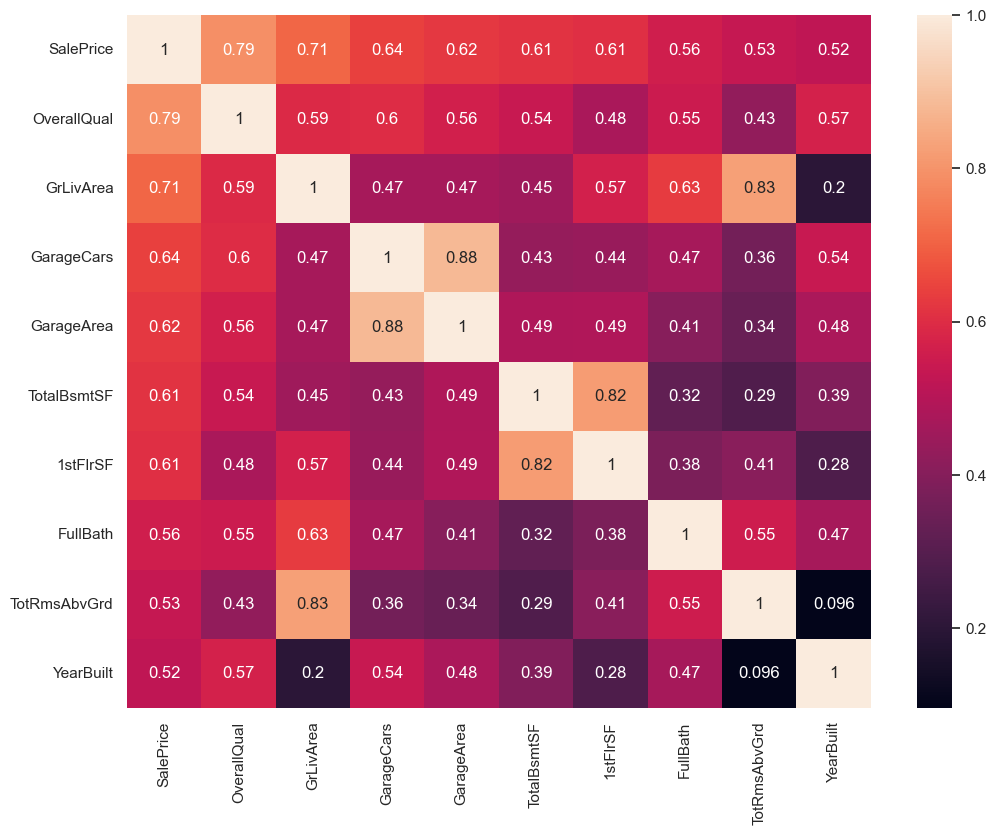

In [15]:
figure_4_1, axes_4_2 = heatmap(df=floatDataFrame_1_1)

### Step 5: `boxplot`
#### Notes
> kwarg `x` should be column with few features.
    > kwarg `hue` should be column with few features.
#### inputs:
- 1
	- DataClass: `FloatDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- src: `(1, 0)`
- 2
	- DataClass: `IntColumn`
	- StatisticalRelevance: `DependentVariable`
	- APE_label: `['SalePrice']`
	- src: `(0, 9)`
- 3
	- DataClass: `StrColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['SaleCondition']`
	- src: `(0, 10)`
- 4
	- DataClass: `IntColumn`
	- StatisticalRelevance: `IndependentVariable`
	- APE_label: `['YearBuilt']`
	- src: `(0, 1)`
- 5
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`
	- src: `(3, 0)`
- 6
	- DataClass: `Axes`
	- StatisticalRelevance: `NoRelevance`
	- src: `(2, 1)`
#### outputs:
- 1
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`
- 2
	- DataClass: `Axes`
	- StatisticalRelevance: `NoRelevance`

In [16]:
figure_5_1, axes_5_2 = boxplot(df=floatDataFrame_1_1, y='SalePrice', x='SaleCondition', hue='YearBuilt', fig=figure_3_1, ax=axes_2_2)

ValueError: Could not interpret input 'SaleCondition'

### Step 6: `pairplot`
#### Notes
Passing `col` and `n` will only display `n` most correlating features.
    > kwarg `hue` should be column with few features.
#### inputs:
- 1
	- DataClass: `MixedDataFrame`
	- StatisticalRelevance: `NoRelevance`
	- APE_label: `['housing_train']`
	- src: `(0, 11)`
- 2
	- DataClass: `IntColumn`
	- StatisticalRelevance: `DependentVariable`
	- APE_label: `['SalePrice']`
	- src: `(0, 9)`
- 3
	- DataClass: `Int`
	- StatisticalRelevance: `BasicObjectRelevance_plain`
	- APE_label: `['10']`
	- src: `(0, 13)`
- 4
	- DataClass: `IntColumn`
	- StatisticalRelevance: `DependentVariable`
	- APE_label: `['SalePrice']`
	- src: `(0, 9)`
#### outputs:
- 1
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`

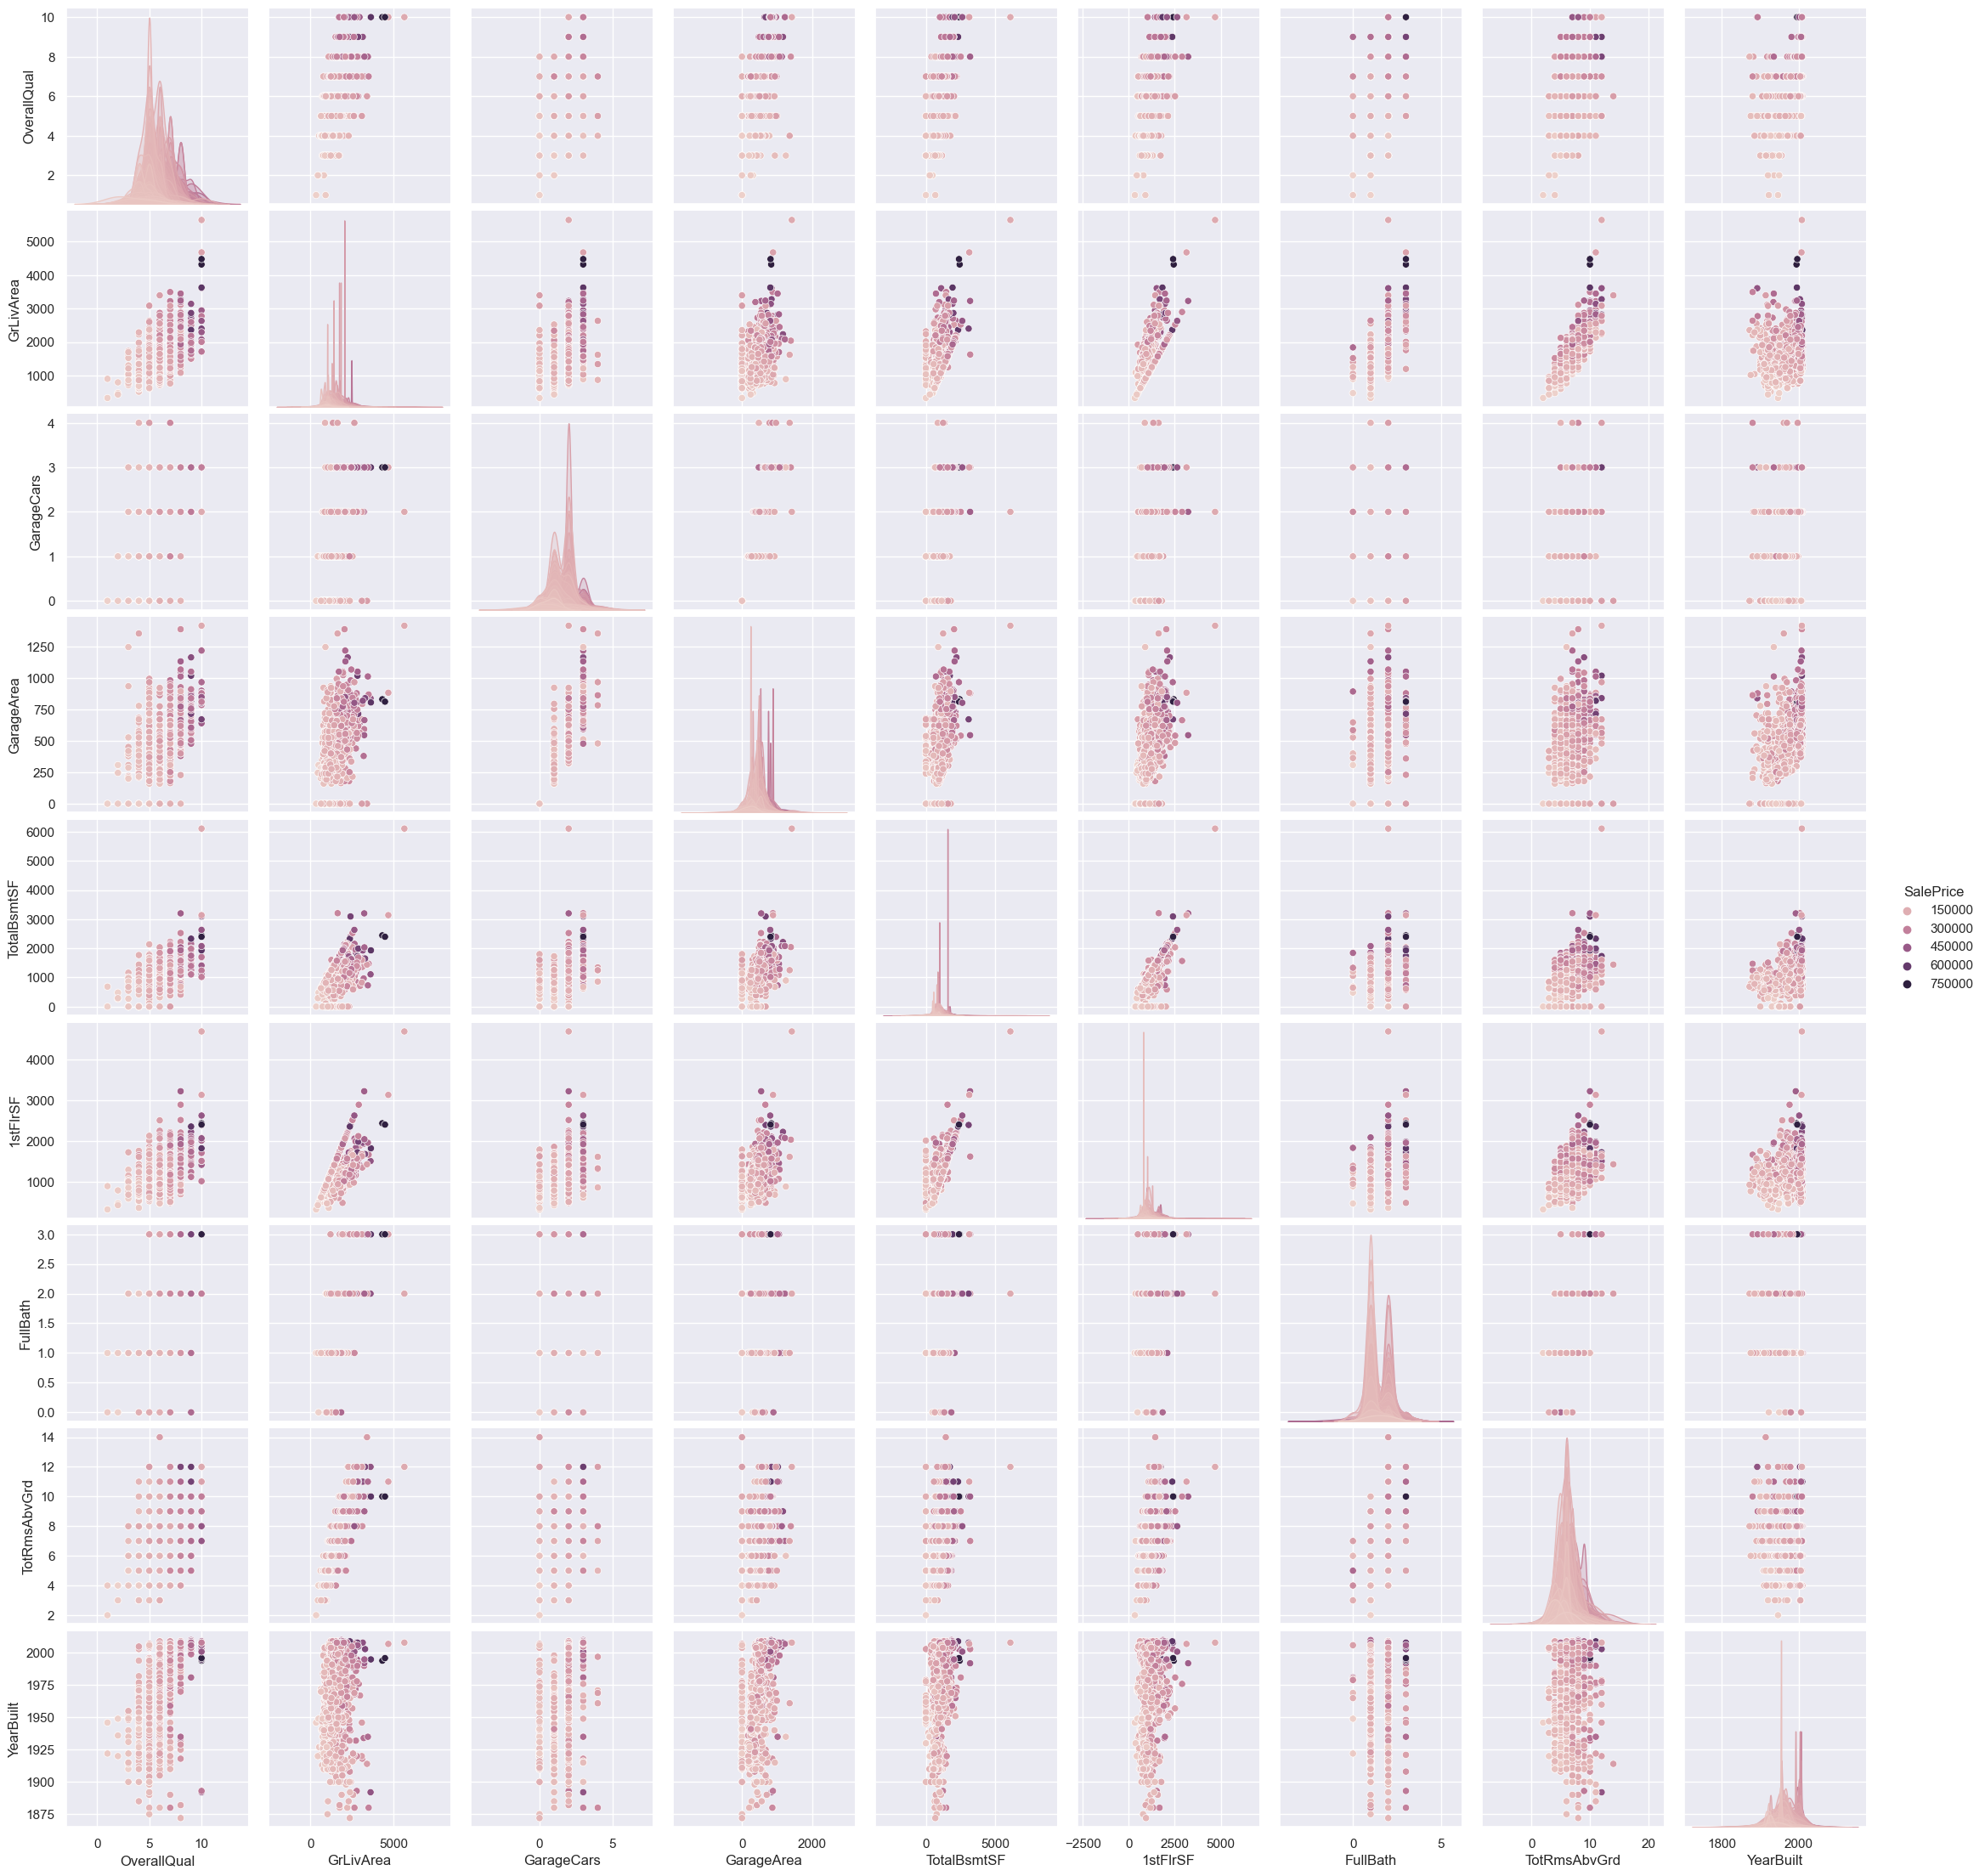

In [17]:
figure_6_1 = pairplot(data=housing_train, col='SalePrice', n=10, hue='SalePrice')

### Step 7: `rotate_x_labels`

#### inputs:
- 1
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`
	- src: `(5, 0)`
- 2
	- DataClass: `Axes`
	- StatisticalRelevance: `NoRelevance`
	- src: `(2, 1)`
#### outputs:
- 1
	- DataClass: `Figure`
	- StatisticalRelevance: `NoRelevance`
- 2
	- DataClass: `Axes`
	- StatisticalRelevance: `NoRelevance`

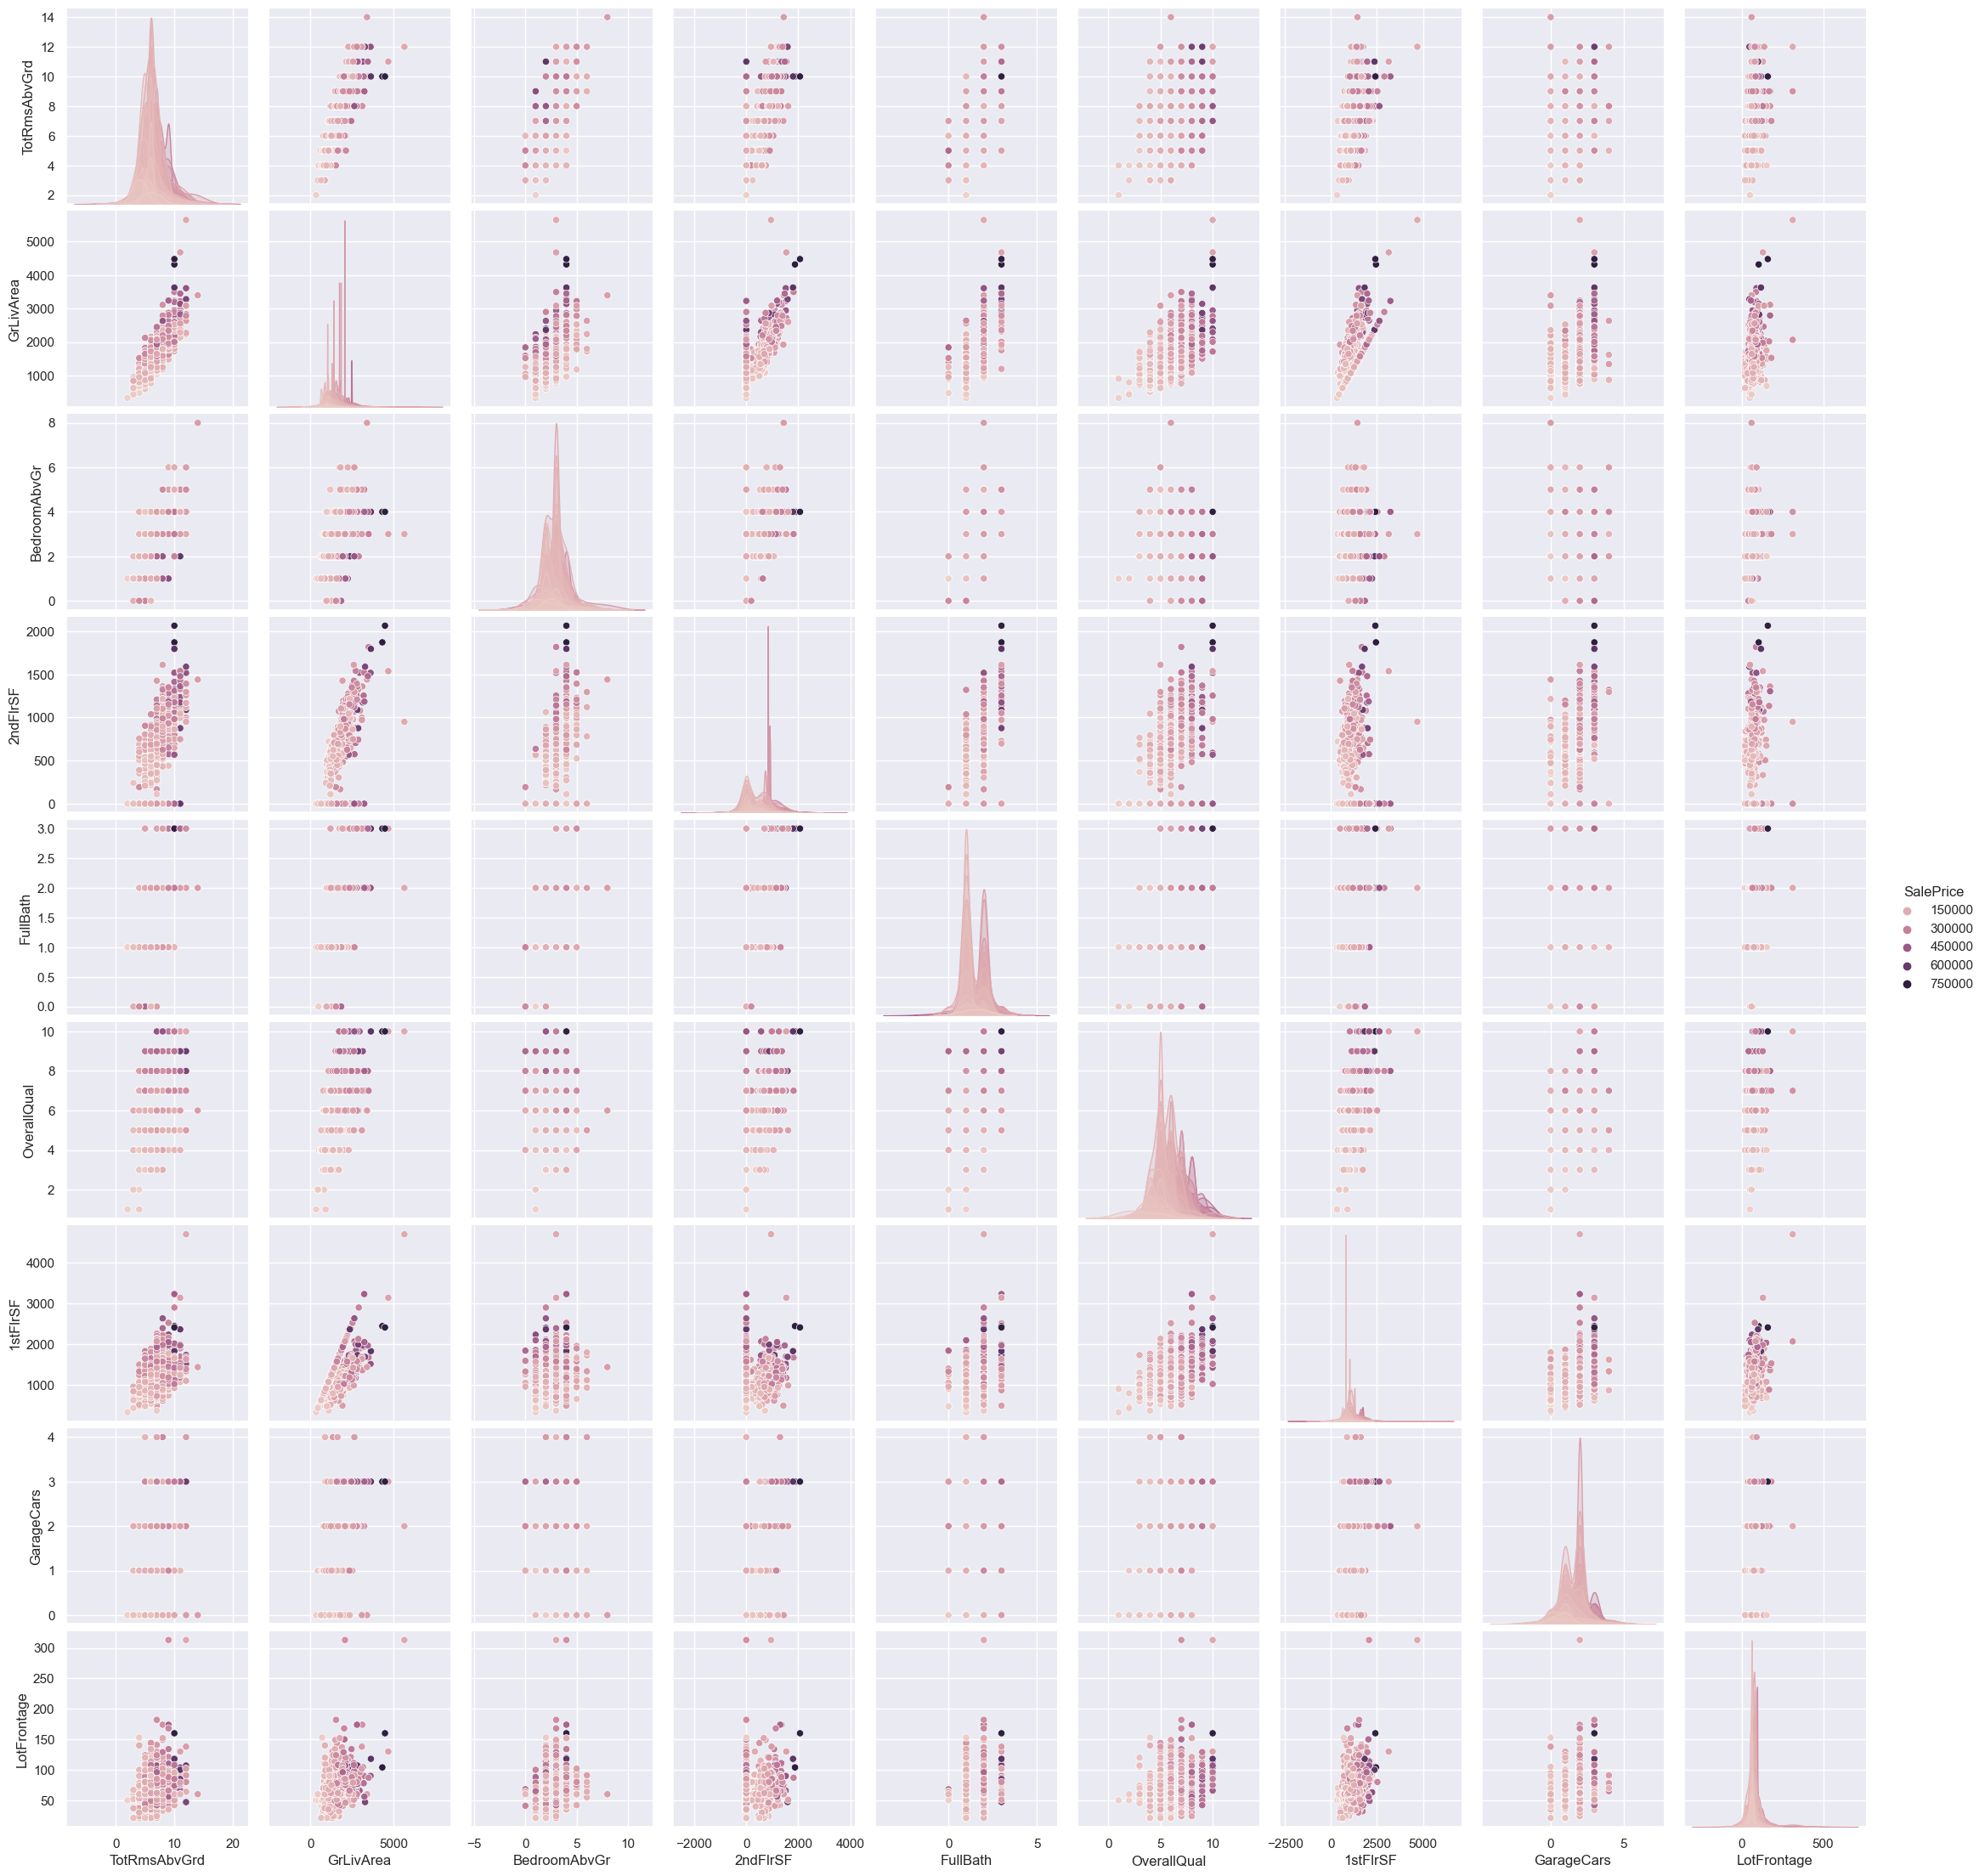

In [18]:
figure_7_1, axes_7_2 = rotate_x_labels(figure=figure_5_1, axes=axes_2_2)